# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision


## Tutorial 09 - Camera Calibration and Epipolar Geometry
---

## <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* [Camera Model](#-Camera-Model)
* [Camera Calibration](#-Camera-Calibration)
    * [Estimating M](#-Estimating-$M$)
    * [Chessboard Demo](#-Chessboard-Calibration-in-OpenCV)
    * [Homography Quiz](#-Homography-Quiz)
* [Epipolar Geometry](#-Epipolar-Geometry)
    * [Essential Matrix](#-Essential-Matrix)
    * [Fundamental Matrix](#-Fundamental-Matrix)
    * [Fundamental Demo](#-Fundamental-Demo)
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

## <img src="https://img.icons8.com/doodle/48/000000/compact-camera--v1.png" style="height:50px;display:inline"> Camera Model
--- 

### <img src="https://img.icons8.com/doodle/48/000000/compact-camera--v1.png" style="height:50px;display:inline"> The (rearranged) pinhole camera
--- 

<img src="./assets/geom_pinhole.png" width="800">

* A 3D world point $P$ is projected by the camera matrix $M$ to the 2D image point $p$

### <img src="https://img.icons8.com/doodle/48/000000/compact-camera--v1.png" style="height:50px;display:inline"> The (rearranged) pinhole camera
--- 

<img src="./assets/geom_pinhole3.png" width="800">

### <img src="https://img.icons8.com/doodle/48/000000/compact-camera--v1.png" style="height:50px;display:inline"> The (rearranged) pinhole camera
--- 

<img src="./assets/geom_pinhole4.png" width="800">

* What is the decomposed structure of $M$?

### <img src="https://img.icons8.com/doodle/48/000000/compact-camera--v1.png" style="height:50px;display:inline"> The Camera Matrix
--- 

<img src="./assets/geom_pinhole2.png" width="800">

* $M$ is a $3 \times 4$ matrix comprised of two sets of parameters: **Intrinsic** and **Extrinsic**.

### <img src="https://img.icons8.com/doodle/48/000000/compact-camera--v1.png" style="height:50px;display:inline"> The Camera Matrix
--- 

<img src="./assets/geom_pinhole5.png" width="800">


### <img src="https://img.icons8.com/doodle/48/000000/compact-camera--v1.png" style="height:50px;display:inline"> The Camera Matrix
--- 

* How many degress of freedom so far?
* And after switching $f$ with $f_x$ and $f_y$ and adding skew $s$?


## <img src="https://img.icons8.com/wired/64/000000/rotate.png" style="height:50px;display:inline"> Camera Calibration
--- 
* Estimation of $M$
* Separating Extrinsic and Intrinsic Parameters

### <img src="https://img.icons8.com/wired/64/000000/rotate.png" style="height:50px;display:inline"> <span style="color:red"> Geometric </span> Camera Calibration: Estimating $M$
--- 

<img src="./assets/geom_M1.png" width="800">

* Where did we get such matched points?

### <img src="https://img.icons8.com/wired/64/000000/rotate.png" style="height:50px;display:inline"> Estimating $M$
--- 

* Same trick as in the Homography tutorial $\rightarrow$ switch to row-wise representation of the unknowns:
$$ \begin{bmatrix} x \\ y  \\ w \end{bmatrix} = \begin{bmatrix} m_{11} & m_{12} & m_{13} & m_{14}\\ m_{21} & m_{22} & m_{23} & m_{24} \\ m_{31} & m_{32} & m_{33} & m_{34} \end{bmatrix}
\begin{bmatrix} X \\ Y  \\ Z \\ 1  \end{bmatrix}$$

* Equivalently
$$ \begin{bmatrix} x \\ y  \\ w \end{bmatrix} = \begin{bmatrix} - & m_1^T & - \\ - & m_2^T & - \\ - & m_3^T & - \end{bmatrix}
P$$



### <img src="https://img.icons8.com/wired/64/000000/rotate.png" style="height:50px;display:inline"> Estimating $M$
--- 

* Resulting equation for $x$ and $y$ in heterogeneous coordinates:
$$\tilde{x} = \frac{m_1^T P}{m_3^T P}, \tilde{y} = \frac{m_2^T P}{m_3^T P}$$

* Rearranging to solve for $m_i$:
$$ m_1^TP - \tilde{x}m_3^T P = 0$$
$$ m_2^TP - \tilde{y}m_3^T P = 0$$

* What is the dimension of $m_i^T P$?



### <img src="https://img.icons8.com/wired/64/000000/rotate.png" style="height:50px;display:inline"> Estimating $M$
--- 

* Rearrange into a matrix for $N_p$ points:
$$ \begin{bmatrix} P_i^T & 0^T & -\tilde{x}_i P_i^T \\ 0^T & P_i^T & -\tilde{y}_i P_i^T \\ . & . & . \\ . & . & . \\  P_{N_p}^T & 0^T & -\tilde{x}_{N_p} P_{N_p}^T \\ 0^T & P_{N_p}^T & -\tilde{y}_{N_p} P_{N_p}^T \end{bmatrix} \begin{bmatrix} | \\ m_1 \\ | \\ m_2 \\ | \\ m_3 \\ | \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ . \\ . \\ 0 \\ 0\end{bmatrix} \leftrightarrow Am = 0$$

* What are the dimensions? How much points $N_p$ do we need?



### <img src="https://img.icons8.com/wired/64/000000/rotate.png" style="height:50px;display:inline"> Estimating $M$
--- 

* boils down to the problem:
$$ \hat{m} = \text{arg}\min\limits_m \| Am \|^2 \ s.t. \|m\|^2 = 1$$ 

* Solution via SVD of $A = U \Sigma V^T$:

    * $\hat{m}$ is the column of V corresponding to the smallest eigen-value.

* How about separating $M$ to $K \left[R \lvert t\right]$?


### <img src="https://img.icons8.com/wired/64/000000/rotate.png" style="height:50px;display:inline"> Decomposition of M to K, R & t

* rewrite $M$:
$$ M = K \left[R \lvert t\right] = K \left[R \lvert -Rc\right] = \left[N \lvert -Nc\right]$$ 

* $c$ can be found via SVD of $M$ due to the relation:
$$ Mc = 0$$

* Then $N$ can be further decomposed into $N = K R $:
    * How? using QR decomposition because $K$ is upper triangular and $R$ is orthogonal

* However..
    * Does not take into account noise, radial distortions, hard to impose prior knowledge (e.g. $f$), etc.
    * Solution?

### <img src="https://img.icons8.com/wired/64/000000/rotate.png" style="height:50px;display:inline"> Minimize reprojection error
--- 

<img src="./assets/geom_M3.png" width="800">

* Where the radial distortion model is: $ \lambda = 1 + k_1 r^2 + k_2 r^ 4 + k_3 r^6$

### <img src="https://img.icons8.com/wired/64/000000/rotate.png" style="height:50px;display:inline"> Minimize reprojection error
--- 
* Radial distortion is multiplicative:
$$ x_{rad} = x \left[1 + k_1 r^2 + k_2 r^ 4 + k_3 r^6\right]$$
$$ y_{rad} = y \left[1 + k_1 r^2 + k_2 r^ 4 + k_3 r^6\right]$$

* Usually we also include tangential distortion:
$$ x_{tan} = x + \left[2 p_1 xy + p_2 \left(r^2+2x^2\right)\right]$$
$$ y_{tan} = y + \left[p_1 \left(r^2 + 2y^2 \right) + 2 p_2 xy\right]$$

* We end up with 5 parameters to estimate:
$$ \text{distortion coefficients} = \left[k_1, k_2, k_3, p_1, p_2\right]^T$$

## <img src="https://img.icons8.com/officel/16/000000/rook.png" style="height:50px;display:inline"> Chessboard Calibration in OpenCV
--- 
* Take a notebook and paste a chesspattern
* Capture this pattern from several angles and positions
* Calibrate using OpenCV

## <img src="https://img.icons8.com/officel/16/000000/rook.png" style="height:50px;display:inline"> Chessboard Calibration in OpenCV
--- 
* Getting the 3D to 2D points correspondences from a known planar object
* Chessboard has fixed distances between squares known apriori
* Camera static and chessboard moves $\leftrightarrow$ chessboard static and camera moves
* Camera moves $\leftrightarrow$ Extrinsic parameters in each frame change
* Therefore we got the matches of real world points and camera points $\left\{P_i, p_i\right\}_{i=1}^N$!
    * $P_i = \left[X_i, Y_i, Z_i=0\right]$, where, $X_i, Y_i$ set by periodicity of the chessbaord
    * $p_i = \left[x_i, y_i\right]$, detected corners in the image

In [1]:
import numpy as np
import cv2
import glob
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('./assets/left*.jpg')
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        imlast = cv2.drawChessboardCorners(img, (7,6), corners2, ret)
        cv2.imshow('img', img)
        cv2.waitKey(500)
cv2.destroyAllWindows()

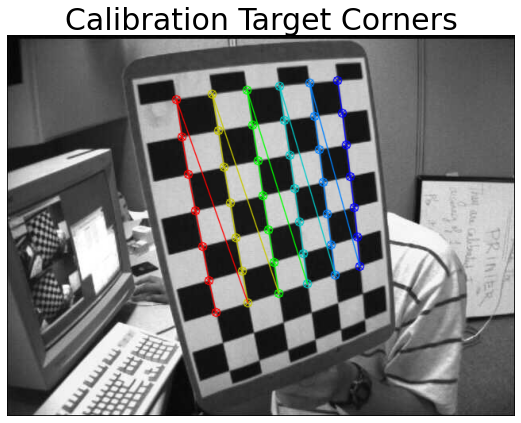

In [2]:
# show the last image and the detected corners
import matplotlib.pyplot as plt
plt.figure(figsize=(11,7))
plt.imshow(imlast)
plt.axis('off')
plt.title('Calibration Target Corners', fontsize=30)
plt.show()

In [3]:
# now that we have object points and and image points, we just apply OpenCV builtin function
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# resulting camera matrix
print("M = ")
print(repr(mtx))

# distortion coeff.
print("distortion coeff = ")
print(repr(dist))

M = 
array([[534.07088364,   0.        , 341.53407554],
       [  0.        , 534.11914595, 232.94565259],
       [  0.        ,   0.        ,   1.        ]])
distortion coeff = 
array([[-2.92971637e-01,  1.07706962e-01,  1.31038376e-03,
        -3.11018780e-05,  4.34798110e-02]])


In [4]:
# Rodriguez rotation vectors and translation vectors
print("Rotation vector 1 = ")
print(rvecs[0])
print("Translation vector 1 = ")
print(tvecs[0])

print("\n . \n . \n . \n")

Rotation vector 1 = 
[[-0.43239599]
 [ 0.25603401]
 [-3.08832021]]
Translation vector 1 = 
[[ 3.79739146]
 [ 0.89895018]
 [14.8593055 ]]

 . 
 . 
 . 



In [5]:
print("Rotation vector N = ")
print(rvecs[-1])
print("Translation vector N = ")
print(tvecs[-1])

Rotation vector N = 
[[-0.17288944]
 [-0.46764681]
 [ 1.34745198]]
Translation vector N = 
[[ 1.81888151]
 [-4.2642919 ]
 [12.45728517]]


In [6]:
# let us examine the distortion on a given image
img = cv2.imread('./assets/left12.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]

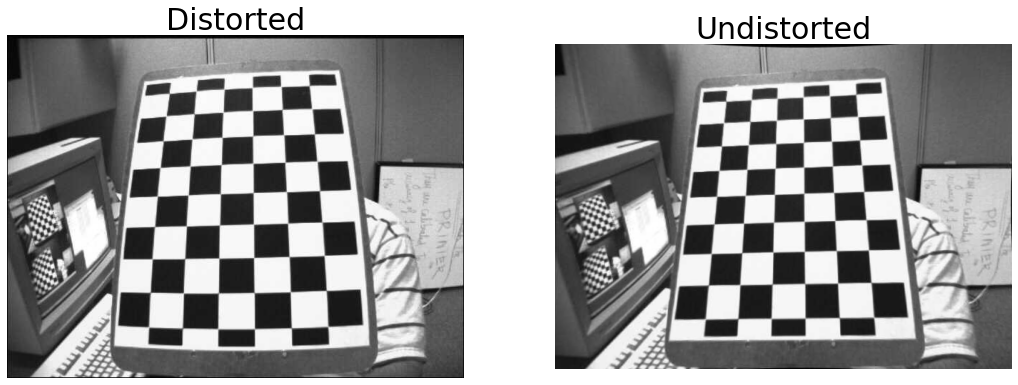

In [7]:
# plot the image ebfore and after fixing distortion
plt.figure(figsize=(18,13))
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Distorted', fontsize=30)
plt.subplot(1,2,2)
plt.imshow(dst)
plt.axis('off')
plt.title('Undistorted', fontsize=30)
plt.show()

In [8]:
# checking reprojection errors for validation - ideally we should get ~0
mean_error = 0
errs_all = []
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    errs_all.append(np.squeeze(np.sqrt(np.sum((imgpoints[i] - imgpoints2)**2,axis=2))))

# all reprojection errors in absolute pixel values
errs_all = np.hstack(errs_all)
print("Mean error: {:.4f} px".format(errs_all.mean()))

Mean error: 0.1387 px


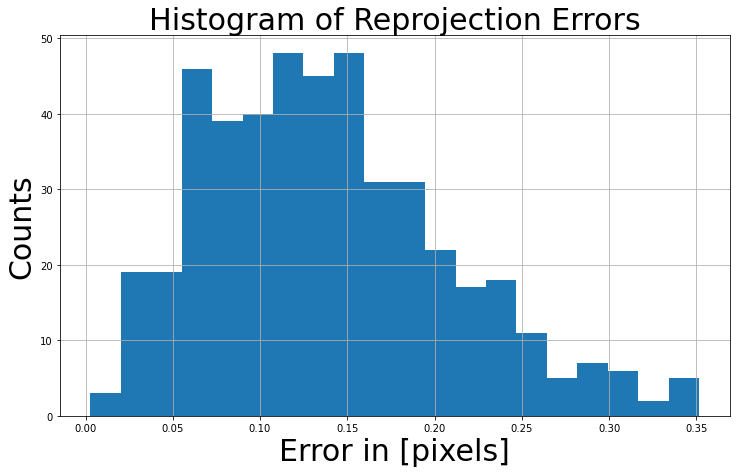

In [9]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(1, 1 ,1)
ax.hist(errs_all, 20)
ax.set_title("Histogram of Reprojection Errors", fontsize=30)
ax.set_xlabel('Error in [pixels]', fontsize=30)
ax.set_ylabel('Counts', fontsize=30)
ax.grid()

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 



## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* **Quiz1**: Prove that a $3\times 3$ homography transform $H$ is sufficient to describe the mapping between a planar 3D object and a camera, i.e. point matches of the form $\left\{p_i , P_i\right\}$, where $p_i = \left[x_i,y_i,w_i\right]^T$ and $P_i=\left[X_i,Y_i,Z_i,1\right]^T$ satisfying $aX_i + bY_i + cZ_i + d = 0$.

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

In this special case of a **planar scene**, we do not need the full $3 \times 4$ camera matrix $M$, and we can make due with a $3\times3$ homography matrix $H$. The proof is relatively straight forward, and rely on the following observation:

Since the points in 3D lie on a plane: $$aX + bY + cZ + d = 0$$

we can switch sides and write down the plane equation for $Z$, such that $$P_i = \left[X_i, Y_i, -\frac{a}{c} X_i -\frac{b}{c} Y_i-\frac{d}{c}, 1\right]^T$$.

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* This leads to the main conclusion that the 4D homogeneous coordinates are redundant and can be written down by a 3D homogeneous coordinates:

$$ \begin{bmatrix} X_i \\ Y_i \\ Z_i \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ -\frac{a}{c} & -\frac{b}{c} & -\frac{d}{c} \end{bmatrix} \begin{bmatrix} X_i \\ Y_i \\ 1 \end{bmatrix}$$ 

* Now coming back to the general camera matrix $M$ how can we conclude it can be reduced to a homography? 
    * The answer lies in simplifying the matrix-vector product. 

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* A general $M$ satisfy the relation:

$$ \begin{bmatrix} x_i \\ y_i \\ w_i \end{bmatrix} = \begin{bmatrix} m_{11} & m_{12} & m_{13} & m_{14} \\ m_{21} & m_{22} & m_{23} & m_{24} \\ m_{31} & m_{32} & m_{33} & m_{34} \end{bmatrix} \begin{bmatrix} X_i \\ Y_i \\ Z_i \\ 1 \end{bmatrix}$$ 

* Assuming the scene is planar, we plug in the plane equation for $Z_i = -\frac{a}{c} X_i -\frac{b}{c} Y_i-\frac{d}{c}$:

$$ \begin{bmatrix} x_i \\ y_i \\ w_i \end{bmatrix} = \begin{bmatrix} m_{11} & m_{12} & m_{13} & m_{14} \\ m_{21} & m_{22} & m_{23} & m_{24} \\ m_{31} & m_{32} & m_{33} & m_{34} \end{bmatrix} \begin{bmatrix} X_i \\ Y_i \\ -\frac{a}{c} X_i -\frac{b}{c} Y_i-\frac{d}{c} \\ 1 \end{bmatrix}$$

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* Now, let us look more closely at the formula for $x_i$: 

$$x_i = m_{11} X_i + m_{12} Y_i + m_{13} \left(-\frac{a}{c} X_i -\frac{b}{c} Y_i-\frac{d}{c}\right) + m_{14}$$ 

* The terms can be rearranged and written as: 

$$x_i = \left(m_{11} -\frac{a}{c} m_{13} \right)X_i + \left(m_{12} -\frac{b}{c} m_{13} \right) Y_i + \left(m_{14} - m_{13} \frac{d}{c}\right)$$

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* Similarly, this can be done for $y_i$ and $w_i$:

$$y_i = \left(m_{21} -\frac{a}{c} m_{23} \right)X_i + \left(m_{22} -\frac{b}{c} m_{23} \right) Y_i + \left(m_{24} - m_{23} \frac{d}{c}\right)$$

$$w_i = \left(m_{31} -\frac{a}{c} m_{33} \right)X_i + \left(m_{32} -\frac{b}{c} m_{33} \right) Y_i + \left(m_{34} - m_{33} \frac{d}{c}\right)$$

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* Therefore, rewriting this in matrix form we get the following relation:

$$ \begin{bmatrix} x_i \\ y_i \\ w_i \end{bmatrix} = \begin{bmatrix} m_{11} -\frac{a}{c} m_{13} & m_{12} -\frac{b}{c} m_{13} & m_{14} - \frac{d}{c} m_{13} \\ m_{21} -\frac{a}{c} m_{23} & m_{22} -\frac{b}{c} m_{23} & m_{24} - \frac{d}{c} m_{23} \\ m_{31} -\frac{a}{c} m_{33} & m_{32} -\frac{b}{c} m_{33} & m_{34} - \frac{d}{c} m_{33} \end{bmatrix} \begin{bmatrix} X_i \\ Y_i \\ 1 \end{bmatrix}$$ 

* Meaning, the 3D point $P_i$ can be indeed reduced to a 3D homogeneous vector $\left[X_i , Y_i, 1\right]^T$, and is related to the 2D point in the image $p_i = \left[x_i, y_i, w_i \right]$ through a $3 \times 3$ homography $H$ that is a function of the entries in the general $ 3 \times 4$ camera matrix $M$, and the normal to the plane $\left[a,b,c,d\right]^T$.

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* **Quiz2**: Prove that there exists a homography $H$ that satisfies:
$$p_1 \equiv H p_2 $$
between the 2D points (in homogeneous coordinates) $p_1$ and $p_2$ in the images of a plane $\Pi$ captured by two $3\times 4$ camera projection matrices $M_1$ and $M_2$, respectively.
The symbol $\equiv$ stands for equality $\textit{up to scale}$. 

(Note: A degenerate case happens when the plan $\Pi$ contains both cameras' centers, in which case there are infinite choices of $H$ satisfying the equation. You can ignore this special case in your answer.)

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* Plane in 3D using homogeneous coordinates is given by:
$$n^T P = 0$$
Where $n,P$ are homogeneous vectors (4 numbers each) and $n$ is the normal to the plane.

* Therefore, we can find a basis of 3 vectors $u_1, u_2, u_3$ in $R^4$, such that each point on the plane is given by:
$$ P = \sum\limits_{i=1}^3 \alpha_i u_i $$

* The projection of 3D point $P$ to the $j^{th}$ image point $p_j$ is given by:
$$ p_j = M_j P = \sum\limits_{i=1}^3 \alpha_i M_j u_i $$

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* If we denote $v_j^i = M_j u_i$ we get:
$$ p_1 = \sum\limits_{i=1}^3 \alpha_i v_1^i $$
$$ p_2 = \sum\limits_{i=1}^3 \alpha_i v_2^i $$

* Hence, the relation between the two points is a $3 \times 3$ matrix satisfying:

$$ \begin{bmatrix} | & | & | \\ v_1^1 & v_1^2 & v_1^3 \\ | & | & | \end{bmatrix} = \begin{bmatrix} * & * & * \\ * & * & * \\ * & * & * \end{bmatrix} \begin{bmatrix} | & | & | \\ v_2^1 & v_2^2 & v_2^3 \\ | & | & | \end{bmatrix}$$

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* Relation to camera calibration:
    * Recall that we have 11 degrees of freedom in $M$.
    * If all the calibration points are on a plane, we get at most 8 independent equations out of 4 pts.
    * Any $5^{\text{th}}$ point will result in constraints that are linearly dependent on the constraints from the previous 4 pts on the plane.
    * Therefore, in estimating $M$ we can't rely on a single image of the chessboard.

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* **Quiz3**: Prove that there exists a homography $H$ that satisfies the equation $ p_1 = H p_2 $, given two cameras separated by a pure rotation. That is, for camera 1, $p_1 = K_1 \left[I \lvert 0\right]P$, and for camera 2, $p_2 = K_2 \left[R \lvert 0\right]P$. Note that $K_1$ and $K_2$ are the $3 \times 3$ intrinsic matrices of the cameras and are different. $I$ is $3 \times 3$ identity matrix, $0$ is a $3\times 1$ zero vector and $P$ is a point in 3D space. $R$ is the $3\times 3$ rotation matrix of the camera. 

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* Since the last column is zero, we can see that:
$$ \begin{bmatrix} X \\ Y \\ Z \end{bmatrix} = R^{-1} K_2^{-1} p_2$$

* Substituting this in the second equation we get:
$$ p_1 = K_1 R^{-1} K_2^{-1} p_2 $$

* Therefore, the resulting homography is given by:

$$ H = K_1 R^{-1} K_2^{-1}$$

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* Take away is 2 cameras differing only in rotation can't triangulate!
* Remember where this was useful?
    * Panorama stitching! (There we did not care about recovering depth)

<img src="./assets/geom_quiz1.png" width="600">

* Image Source - Prince.

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* **Quiz4**: Suppose that a camera is rotating about its center $C$, keeping the intrinsic parameters $K$ constant. Let $H$ be the homography that maps the view from one camera orientation to the view at a second orientation. Let $\theta$ be the angle of rotation between the two. Show that $H^2$ is the homography corresponding to a rotation of $2\theta$. 

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* We have just shown that for such a scenario:
$$H_{2\rightarrow 1} = K_1 R_{\theta}^{-1} K_2^{-1}$$
$$H_{1\rightarrow 2} = K_2 R_{\theta} K_1^{-1}$$


* Applying the constraint $K_1 = K_2 \equiv K$ gets us:
$$H_{1\rightarrow 2} = K R_{\theta} K^{-1}$$

* Applying $H_{1\rightarrow 2}$ twice gets us:
$$H_{1\rightarrow 2}^2 = K R_{\theta} K^{-1} K R_{\theta} K^{-1} = K R_{\theta} R_{\theta} K^{-1}$$

* Since $R_{\theta} R_{\theta} = R_{2\theta}$, we indeed get:
$$H_{1\rightarrow 2}^2 = K R_{2\theta} K^{-1}$$

Which is a homography that corresponds to a rotation of $2\theta$.

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* **Quiz5**: Prove that points on a single line do not uniquely constrain the homography $H$. In other words, prove that we need points on at least 2 different directions within the plane to estimate a homography reliably. (Quiz 7)

## <img src="https://img.icons8.com/wired/64/000000/quizlet.png" style="height:50px;display:inline"> Homography Quiz
--- 

* If all points lie on a line there is a $3\times1$ vector $l$ such the $l^Tp=0$ for all points $p$.

* Now suppose you found a homography matrix $H$ such that $p_j'=H*p_j$, and yet all your points satisfy $l^Tp_j=0$.

* Then it is easy to see that for every $3\times1$ vector $v$ the matrix $H'=H+v*l^T$  will also satisfy $p_j'=H'*p_j$

* This implies that there is no unique $H$ which explains points on the same line.

## <img src="https://img.icons8.com/wired/64/000000/octaedro.png" style="height:50px;display:inline"> Epipolar Geometry
--- 

### <img src="https://img.icons8.com/wired/64/000000/octaedro.png" style="height:50px;display:inline"> Epipolar Lingo
--- 

<img src="./assets/geom_epipolar1.png" width="700">


### <img src="https://img.icons8.com/wired/64/000000/octaedro.png" style="height:50px;display:inline"> Essential Matrix
--- 

<img src="./assets/geom_epipolar2.png" width="700">


### <img src="https://img.icons8.com/wired/64/000000/octaedro.png" style="height:50px;display:inline"> Essential Matrix vs Homography
--- 

<img src="./assets/geom_epipolar3.png" width="700">


### <img src="https://img.icons8.com/wired/64/000000/octaedro.png" style="height:50px;display:inline"> Essential Matrix - Geometric Interpretation
--- 

<img src="./assets/geom_epipolar4.png" width="700">


### <img src="https://img.icons8.com/wired/64/000000/octaedro.png" style="height:50px;display:inline"> Essential Matrix Properties
--- 

<img src="./assets/geom_epipolar5.png" width="700">


### <img src="https://img.icons8.com/wired/64/000000/omega.png" style="height:50px;display:inline"> Fundamental Matrix
--- 

<img src="./assets/geom_epipolar6.png" width="700">


### <img src="https://img.icons8.com/wired/64/000000/omega.png" style="height:50px;display:inline"> Fundamental Geometric Interpretation
--- 

<img src="./assets/geom_epipolar8.png" width="700">


### <img src="https://img.icons8.com/wired/64/000000/omega.png" style="height:50px;display:inline"> Fundamental Matrix Properties
--- 

<img src="./assets/geom_epipolar7.png" width="700">


### <img src="https://img.icons8.com/wired/64/000000/omega.png" style="height:50px;display:inline"> Fundamental Matrix Estimation
--- 
* Assume we are given 2D to 2D M matched image points:
$$\left\{p_i, p_i'\right\}_{i=1}^M$$

* Each cosspondence should satisfy:
$$p_i^T F p_i' = 0 \leftrightarrow \begin{bmatrix} x_i & y_i & 1\end{bmatrix}^T \begin{bmatrix} f_1 & f_2 & f_3 \\ f_4 & f_5 & f_6 \\ f_7 & f_8 & f_9 \end{bmatrix} \begin{bmatrix} x_i' \\ y_i' \\ 1\end{bmatrix} = 0$$

* How to solve?
    * The 8-point algorithm $\leftrightarrow$ arrange into homogeneous linear equations and SVD..

### <img src="https://img.icons8.com/wired/64/000000/omega.png" style="height:50px;display:inline"> Fundamental Matrix Estimation
--- 

<img src="./assets/geom_epipolar10.png" width="800">

* How much matches needed to solve?
* How much did we need for Homography?

### <img src="./assets/opencv-logo-1.png" style="height:50px;display:inline"> Fundamental Matrix Demo
--- 

In [10]:
# start by detecting features and matching them with SIFT
img1 = cv2.imread('./assets/left.jpg',0)  #queryimage # left image
img2 = cv2.imread('./assets/right.jpg',0) #trainimage # right image
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

In [11]:
# ratio test as per Lowe's paper
pts1 = []
pts2 = []
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

In [12]:
# estimating the fundamental matrix
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [13]:
# drawing epilines
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

In [14]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

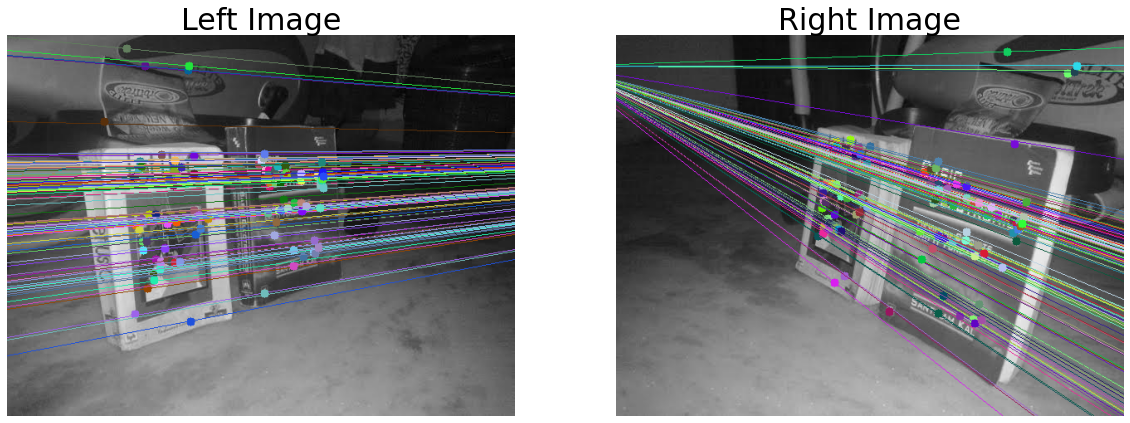

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img5)
plt.axis('off')
plt.title('Left Image', fontsize=30)
plt.subplot(122)
plt.imshow(img3)
plt.axis('off')
plt.title('Right Image', fontsize=30)
plt.show()

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject
* Epipolar and Essential matrix - <a href="https://www.youtube.com/watch?v=Opy8xMGCDrE">William Hoff</a>
* Fundamental Matrix - <a href="https://www.youtube.com/watch?v=wb9245ZAoaE">William Hoff</a>
* The Fundamental Matrix Song - <a href="https://www.youtube.com/watch?v=DgGV3l82NTk">Daniel Wedge</a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
----
* EE 046746 Spring 2021 - <a href="https://eliasnehme.github.io/">Elias Nehme</a>
* EE 046746 Spring 2020 - <a href="https://il.linkedin.com/in/dahlia-urbach-97a816123">Dahlia Urbach</a>
* Slides - Elad Osherov (Technion), Simon Lucey (CMU)
* Multiple View Geometry in Computer Vision - Hartley and Zisserman - Chapter 6
* <a href="cmp.felk.cvut.cz/cmp/courses/XE33PVR/WS20072008/Lectures/Supporting/constrained_lsq.pdf"> Least–squares Solution of Homogeneous Equations </a> - Center for Machine Perception - Tomas Svoboda
* <a href="http://www.computervisionmodels.com/">Computer vision: models, learning and inference</a> , Simon J.D. Prince - Chapter 15
* <a href="https://www.springer.com/gp/book/9781848829343">Computer Vision: Algorithms and Applications</a> - Richard Szeliski - Sections 2.1.5, 6.2. , 7.1, 7.2, 11.1

* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
